## Previous configuration

In [127]:
!pip install tensorflow opencv-python matplotlib

In [128]:
import tensorflow as tf
import os

In [129]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Load data

In [130]:
import numpy as np
from matplotlib import pyplot as plt

In [131]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2515 files belonging to 36 classes.


In [132]:
data_iterator = data.as_numpy_iterator()

In [133]:
#batch[0]= img
#batch[1]= class
batch = data_iterator.next()
print(batch[0].min())
print(batch[0].max())

0.0
255.0


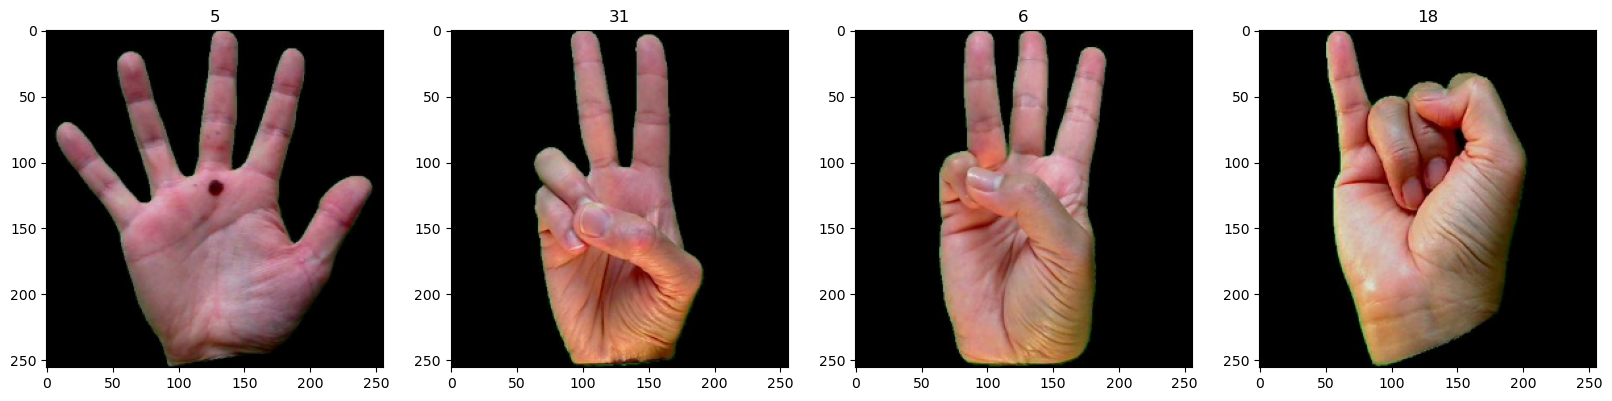

In [134]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Procces data

In [135]:
data = data.map(lambda x, y: (x/255, y))

In [136]:
scale_data_iterator = data.as_numpy_iterator()
batch = scale_data_iterator.next()
print(batch[0].min())
print(batch[0].max())

0.0
1.0


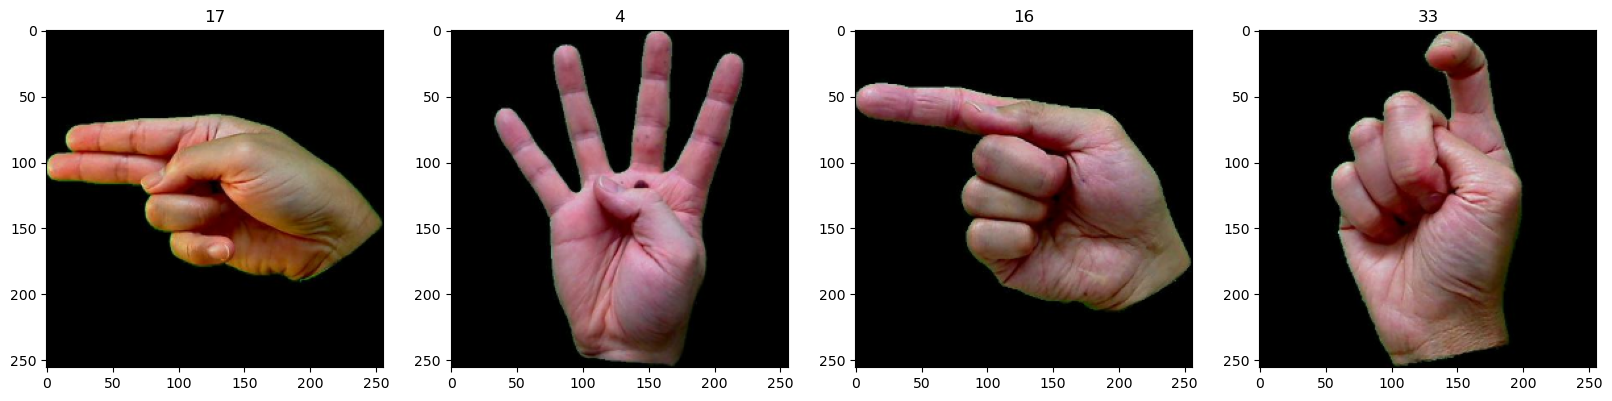

In [137]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [138]:
train_size = int(len(data)*.7) #Train 70%
val_size = int(len(data)*.2)+1 #Validation 20%
test_size = int(len(data)*.1)+1 #Test 10%
len(data)==train_size+val_size+test_size

True

In [139]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [141]:
model = Sequential()

In [142]:
#number filters, size of filter, stried(jump)
#relu => anything below zero. stays as zero, positives keep the value
#sigmoid => equation sigmoid
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(36, activation='softmax'))

In [143]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [144]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [145]:
logdir='logs'

In [146]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [147]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


55/55 [==============================] - 10s 167ms/step - loss: -3047194.0000 - accuracy: 0.0267 - val_loss: -24327520.0000 - val_accuracy: 0.0273
Epoch 2/20
55/55 [==============================] - 9s 163ms/step - loss: -520060256.0000 - accuracy: 0.0267 - val_loss: -2144505216.0000 - val_accuracy: 0.0391
Epoch 3/20
55/55 [==============================] - 9s 165ms/step - loss: -10788895744.0000 - accuracy: 0.0261 - val_loss: -28716171264.0000 - val_accuracy: 0.0332
Epoch 4/20
55/55 [==============================] - 9s 161ms/step - loss: -82939838464.0000 - accuracy: 0.0261 - val_loss: -181825060864.0000 - val_accuracy: 0.0410
Epoch 5/20
55/55 [==============================] - 9s 165ms/step - loss: -380573614080.0000 - accuracy: 0.0261 - val_loss: -717890912256.0000 - val_accuracy: 0.0312
Epoch 6/20
55/55 [==============================] - 9s 162ms/step - loss: -1242811727872.0000 - accuracy: 0.0256 - val_loss: -2039121313792.0000 - val_accuracy: 0.0293
Epoch 7/20
55/55

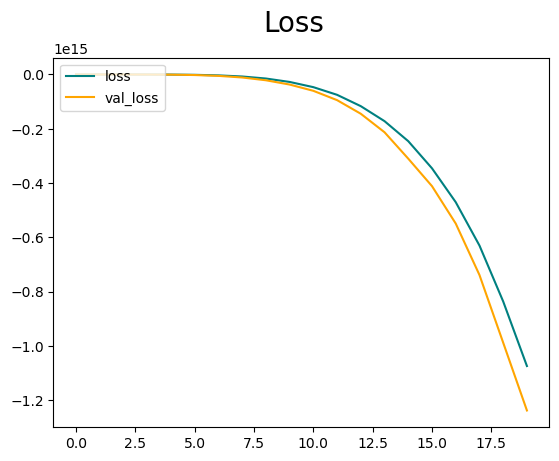

In [148]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

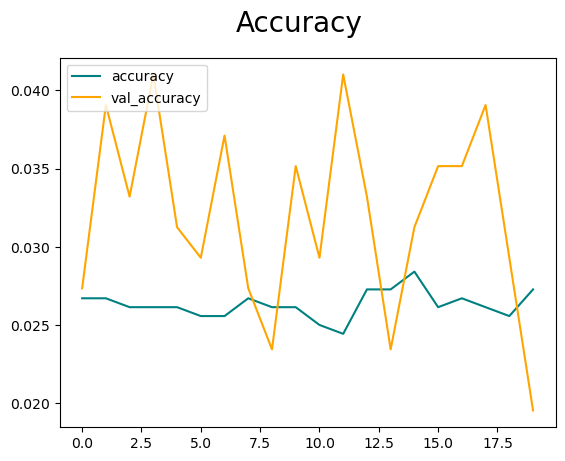

In [149]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()